## Crime Rate Analysis (Police Blotter)

In this part of the project, I used the Police Incident Blotter dataset to calculate a safety score for each neighborhood. I counted how many times police were called to each neighborhood from 2019 to the present.

Neighborhoods with fewer incidents were considered safer and received higher scores. These were normalized on a scale from 0 to 1 so they could be fairly compared with other metrcs.


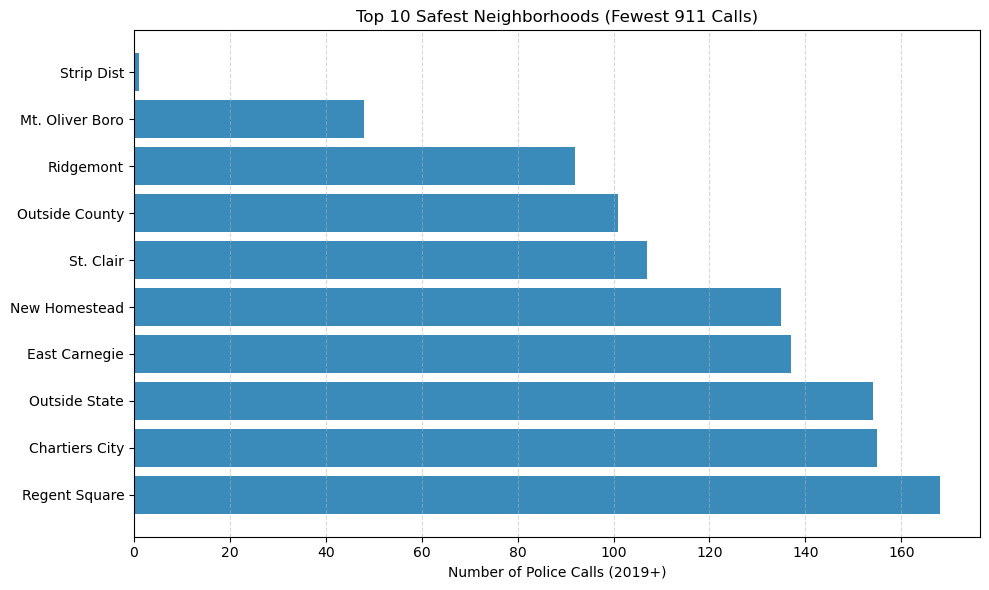

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

crime_df = pd.read_csv("crime_data.csv")

# Step 1: Make sure the time column is in datetime format
crime_df["INCIDENTTIME"] = pd.to_datetime(crime_df["INCIDENTTIME"], errors="coerce")

# Step 2: Keep only incidents from 2019 and later
crime_recent = crime_df[crime_df["INCIDENTTIME"].dt.year >= 2019]

# Step 3: Count calls by neighborhood
crime_counts = crime_recent["INCIDENTNEIGHBORHOOD"].value_counts().reset_index()
crime_counts.columns = ["neighborhood", "crime_calls"]

# Step 4: Top 10 safest neighborhoods
safest = crime_counts.sort_values("crime_calls").head(10)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.barh(safest["neighborhood"], safest["crime_calls"], color="#3b8bba")
plt.xlabel("Number of Police Calls (2019+)")
plt.title("Top 10 Safest Neighborhoods (Fewest 911 Calls)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Normalizing Crime Score

To compare crime with other data like school enrollment and vacancy, I turned the raw police call numbers into a safety score using this formula:

crime_score = 1 - (crime_calls - min) / (max - min)

This gives each neighborhood a score between 0 and 1, where 1 means the safest and 0 means the least safe.

In [4]:
# Normalize crime score
crime_counts["crime_score"] = 1 - (
    (crime_counts["crime_calls"] - crime_counts["crime_calls"].min()) /
    (crime_counts["crime_calls"].max() - crime_counts["crime_calls"].min())
)

# Preview top neighborhoods with best scores
crime_counts.sort_values("crime_score", ascending=False).head(10)

,neighborhood,crime_calls,crime_score
94,Strip Dist,1,1.000000
93,Mt. Oliver Boro,48,0.994678
92,Ridgemont,92,0.989697
91,Outside County,101,0.988678
90,St. Clair,107,0.987998
89,New Homestead,135,0.984828
88,East Carnegie,137,0.984601
87,Outside State,154,0.982677
86,Chartiers City,155,0.982563
85,Regent Square,168,0.981091


## School Enrollment Analysis

For this part, I used public school enrollment data to measure how many students live in each neighborhood. A higher number of students might mean more access to schools and a larger family presence.

Neighborhoods with higher enrollment were given better scores, normalized between 0 and 1.


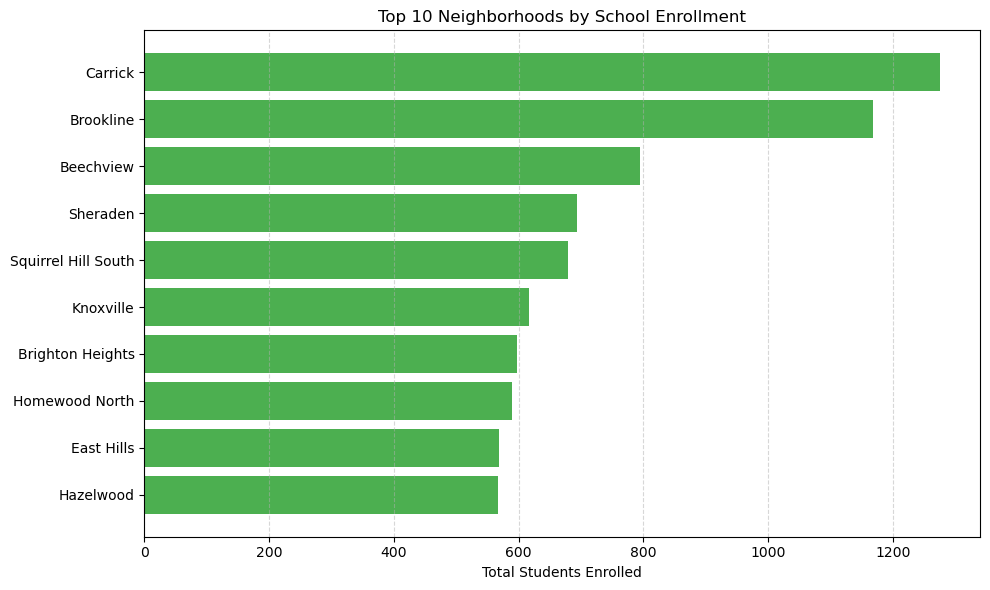

In [6]:
school_df = pd.read_csv("school_enrollment.csv")

# Step 1: Clean data and drop empty rows
school_df = school_df.dropna(subset=["total_students_enrolled"])

# Step 2: Total students by neighborhood
school_totals = school_df.groupby("neighborhood")["total_students_enrolled"].sum().reset_index()

# Step 3: Normalize school score
school_totals["school_score"] = (
    (school_totals["total_students_enrolled"] - school_totals["total_students_enrolled"].min()) /
    (school_totals["total_students_enrolled"].max() - school_totals["total_students_enrolled"].min())
)

# Step 4: Top 10 neighborhoods by school enrollment
top_school = school_totals.sort_values("school_score", ascending=False).head(10)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.barh(top_school["neighborhood"], top_school["total_students_enrolled"], color="#4caf50")
plt.xlabel("Total Students Enrolled")
plt.title("Top 10 Neighborhoods by School Enrollment")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

For my part of the project, I worked on two different metrics: police-reported crime and public school enrollment. I used data to measure how safe each neighborhood is and how strong the public school presence is.

I learned how to clean and group data, normalize values for fair comparison, and create visualizations to help understand the results. It was cool to see how different neighborhoods can look really good in one category and not in another. This showed me how data can help us look at the bigger picture instead of judging a place based on one thing alone.